# Swahili news classification using NLP

## Project Overview
News media plays a crucial role in shaping public opinion, informing societies, and influencing political and social discourse. In East Africa, Swahili is one of the most widely spoken languages, serving as a unifying medium for news dissemination across multiple countries, including Tanzania, Kenya, Uganda, Rwanda, Burundi, and the Democratic Republic of Congo.

With the rise of digital journalism, there has been a rapid increase in Swahili news content, necessitating the need for automated classification of Swahili news articles. This project aims to leverage Natural Language Processing (NLP) and Deep Learning to develop a model that can accurately categorize Swahili news content into predefined categories

## Business Understanding
The challenge in media reporting is managing and organizing large volumes of Swahili-language news content efficiently. Manual classification is time-consuming and prone to inconsistencies, making automated categorization crucial for news platforms, media houses, and content aggregators.

## Objectives

### Automating News Classification.
How can we efficiently categorize Swahili news articles using machine learning and deep learning?
### Understanding Media Trends.
What are the most common news topics in East African media?

Are there any biases in media coverage based on classification trends?

### Enhancing Content Accessibility.
How can automated classification improve information retrieval for journalists, policymakers, and the general public?

## Data Understanding
### Overview
This dataset consists of Swahili news articles categorized into different topics. The goal is to classify news articles into predefined categories using Natural Language Processing (NLP) and Deep Learning techniques.

### Data Structure
The dataset contains the following columns:

id: A unique identifier for each news article.

content: The text of the news article written in Swahili.

category: The label representing the category of the news article (e.g., uchumi, kitaifa, michezo).

### Categories in the Data
The dataset has multiple categories representing different types of news. Some of the common categories include:

Uchumi (Economy): Articles related to business, finance, and economic activities.

Kitaifa (National News): General news related to Tanzania.

Michezo (Sports): News about sports teams, events, and athletes.

(Other categories may exist and need to be explored further.)

### Data Size and Distribution
To understand the dataset better, key aspects to analyze include:

The total number of articles.

The distribution of articles across different categories (class imbalance analysis).

The average length of articles in terms of word count.

### Data Quality Issues
Potential issues to check before preprocessing:

Missing values: Are there any missing or empty fields?

Duplicates: Are there repeated news articles?

Class imbalance: Are some categories significantly overrepresented compared to others?

Noise in text: Presence of irrelevant characters, symbols, or stopwords that may need cleaning.

## Problem Statement  
The goal of this project is to build a Swahili news classification model that accurately categorizes news articles into six predefined categories:

- uchumi (economy)

- kitaifa (national news)

- michezo (sports)

- kimataifa (international news)

- burudani (entertainment)

- afya (health)

To achieve this, we will preprocess the text data to remove noise, tokenize, and normalize the text, followed by building a classification model. To ensure a clear, reproducible, and scalable approach, we will implement the preprocessing steps within an Scikit-learn Pipeline.

In [1]:
!pip install psutil

In [40]:
!pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/299.9 kB 217.9 kB/s eta 0:00:02
   --------- ----------------------------- 71.7/299.9 kB 302.7 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/299.9 kB 450.6 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/299.9 kB 623.6 kB/s eta 0:00:01
   ----------------------------------- -- 276.5/299.9 kB 774.0 kB/s eta 0:00:01
   -------------------------------------- 299.9/299.9 kB 772.5 kB/s eta 0:00:00


In [41]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder , FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

In [3]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Check the first 5 and last 5 columns

This is to check for consisteny through the data. From this we can also see the columns we  are working with.

In [4]:
# Loading the training dataset
train_df = pd.read_csv('data/train.csv')
train_df.head()

id                                            content category
0   SW4670   Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi
1  SW30826   PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa
2  SW29725  Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi
3  SW20901   TIMU ya taifa ya Tanzania, Serengeti Boys jan...  michezo
4  SW12560   Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...  kitaifa

In [5]:
train_df.tail()

id                                            content category
23263  SW24920   Alitoa pongezi hizo alipozindua rasmi hatua y...   uchumi
23264   SW4038   Na NORA DAMIAN-DAR ES SALAAM  TEKLA (si jina ...  kitaifa
23265  SW16649   Mkuu wa Mkoa wa Njombe, Dk Rehema Nchimbi wak...   uchumi
23266  SW23291   MABINGWA wa Ligi Kuu Soka Tanzania Bara, Simb...  michezo
23267  SW11778   WIKI iliyopita, nilianza makala haya yanayole...  kitaifa

#### Observation:  
1. The data maintains uniformity from top to bottom.
2. The columns are: (id, content, category).
3. The train data has 23268 entries.

In [6]:
# Loading the testing dataset
test_df = pd.read_csv('data/test.csv')
test_df.head()

text     label
0   BUNGE limehakikishiwa kuwa hakuna changamoto ...   kitaifa
1   Twiga ilicheza mechi ya kirafiki na Kenya kwe...   michezo
2  ['Miaka mitano iliyopita Harry Maguire alikuwa...   michezo
3  Bethsheba Wambura, Dar es Salaam Msanii wa Bon...  burudani
4  \nMwekezaji wa Klabu ya Simba, Mohammed Dewji ...   michezo

In [7]:
test_df.tail()

text    label
7333   Kamati hiyo ilibainisha kuwa moja ya mapunguf...   uchumi
7334  ARODIA PETER-DODOMA HOSPITALI ya Rufaa ya Benj...  kitaifa
7335   WAKATI mazoezi ya timu ya taifa ya Tanzania (...  michezo
7336  \n\tNa Suleiman Rashid Omar-Pemba\n \n\n \n\tW...  kitaifa
7337   BAO pekee lililofungwa na mshambuliaji wa Yan...  michezo

#### Observation:  
1. The data also maintains uniformity.
2. The columns are (text and label). This set of data does not have an id column.However the text and content columns are similar and also label and category.
3. The test data has 7338 entries.

### Check the details of the datasets

Here we are going to check the number of non-null values and the datatypes of the data in the columns.

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23268 entries, 0 to 23267
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        23268 non-null  object
 1   content   23268 non-null  object
 2   category  23268 non-null  object
dtypes: object(3)
memory usage: 545.5+ KB


#### Observation
1. We can see we do not have null values in the dataset

### Check the categories in the category column.

This being the target we check the categories we are dealing with.

In [9]:
train_df['category'].unique()

array(['uchumi', 'kitaifa', 'michezo', 'kimataifa', 'burudani', 'afya'],
      dtype=object)

#### Observation
The categories are:
1. uchumi - This is the economy category of the news.
2. kitaifa - This is the national news category.
3. michezo - This is the sports news category.
4. kimataifa- this is the international news category.
5. burudani - This is the entertainment news category.
6. afya - this is the health news category.

#### Check the number of values in the categories.

Here we check the number of occurences of each category.

In [10]:
train_df['category'].value_counts()

category
kitaifa      10242
michezo       6004
burudani      2229
uchumi        2028
kimataifa     1906
afya           859
Name: count, dtype: int64

The value counts in order of most frequent to least frequent is:
1. kitaifa   -   10242
2. michezo   -    6004
3. burudani  -    2229
4. uchumi   -     2028
5. kimataifa  -   1906
6. afya     -      859

# Data cleaning

In this step we are going to prepare the data for exploratory data analysis (EDA) and preprocessing. The clleaning objectives are:
1. Lowercasing – Convert all text to lowercase to maintain uniformity.

2. Removing Special Characters & Punctuation – Strip out unnecessary symbols (e.g., !?,.) to clean the text.

3. Removing Stopwords – Remove common Swahili stopwords (requires a Swahili stopwords list, which exists inside the `data` folder as a csv file).

4. Tokenization – Split the text into individual words for further processing.

5. Lemmatization/Stemming – Normalize words to their base form. This is done by removing suffixes and prefixes (this requires a Swahili NLP package).

6. Vectorization – Convert the processed text into numerical features using TF-IDF or CountVectorizer.

We are goiung to implement these steps im a pipeline to automate the process. 


#### Check for Null Values

Null values affect EDA and Modeling negatively and have to be removed from data.  

In [11]:
test_df.isna().sum()

text     0
label    0
dtype: int64

In [12]:
train_df.isna().sum()

id          0
content     0
category    0
dtype: int64

Both the train and test dataset do not have null values.

#### Check for duplicated entries

Duplicates mess with EDA accuracy and model perfomance. We need to deal with them before these steps.

In [13]:
train_df.duplicated().sum()

0

The data does not have duplicated values

#### Drop unnecessary columns

Identity columns contribute nothing to modeling and EDA. In this case the ID column has to be dropped.

In [14]:
# Drop 'id' column before processing
train_df = train_df.drop(columns=["id"])
train_df

content category
0       Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi
1       PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa
2      Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi
3       TIMU ya taifa ya Tanzania, Serengeti Boys jan...  michezo
4       Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...  kitaifa
...                                                  ...      ...
23263   Alitoa pongezi hizo alipozindua rasmi hatua y...   uchumi
23264   Na NORA DAMIAN-DAR ES SALAAM  TEKLA (si jina ...  kitaifa
23265   Mkuu wa Mkoa wa Njombe, Dk Rehema Nchimbi wak...   uchumi
23266   MABINGWA wa Ligi Kuu Soka Tanzania Bara, Simb...  michezo
23267   WIKI iliyopita, nilianza makala haya yanayole...  kitaifa

[23268 rows x 2 columns]

#### Loading the stopwords from the csv file

Stop words are common language occuring words which contribute to grammatical correctness of a text but do not hold much meaning in the message of the text. In modelling these words are noise and have to be removed. The natural language toolkit (NLTK) doesn't have a Swahili library hence we imported the stopwords from an external source.

In [15]:
# Load Swahili stopwords from CSV
stopwords_df = pd.read_csv("data/Common Swahili Stop-words.csv")
stopwords_df.head()

StopWords
0      tuna
1   ilikuwa
2     kisha
3      pili
4     mbaya

In [16]:
# We convert it to a set for fast lookup
swahili_stopwords = set(stopwords_df["StopWords"].dropna())
swahili_stopwords

{'a',
 'acha',
 'afanaleki',
 'aidha',
 'akiwa',
 'ala',
 'ali',
 'alia',
 'aliendelea',
 'alikuwa',
 'aliweza',
 'ama',
 'ambacho',
 'ambako',
 'ambalo',
 'ambamo',
 'ambao',
 'ambapo',
 'ambaye',
 'anafanya',
 'anafikiri',
 'anajua',
 'anakwenda',
 'anatakiwa',
 'anatokea',
 'anaye',
 'angali',
 'anza',
 'atakuwa',
 'au',
 'b',
 'baada',
 'baadaye',
 'baadhi',
 'barabara',
 'basi',
 'bila',
 'bora',
 'budi',
 'c',
 'cha',
 'chake',
 'chako',
 'chini',
 'chochote',
 'chote',
 'd',
 'dhidi',
 'duu',
 'e',
 'ebo',
 'ewaa',
 'f',
 'fauka',
 'g',
 'h',
 'hadi',
 'haiyumkini',
 'halafu',
 'halikadhalika',
 'hao',
 'haohao',
 'hapa',
 'hapana',
 'hapo',
 'haraka',
 'harakaharaka',
 'hasa',
 'hasha',
 'hata',
 'hii',
 'hili',
 'hilihili',
 'hivi',
 'hivyo',
 'hivyohivyo',
 'hiyo',
 'hiyohiyo',
 'hizi',
 'hizo',
 'huko',
 'hukohuko',
 'huku',
 'hukuhuku',
 'humu',
 'humuhumu',
 'huo',
 'huohuo',
 'hususani',
 'huu',
 'ila',
 'ile',
 'ilhali',
 'ili',
 'ilikuwa',
 'ingawa',
 'ingawaje',
 'ipi'

### Defining the suffixes and prefixes for lemmatization

As defined above, lemmatization is the removal of prefixes and suffixes from data to return them to their base form. For this we require the prefix and suffix list. Below are the lists of suffixes and prefixes gotten from multiple searches across the web.

In [17]:

swahili_suffixes = [
            'ni', 'to', 'ua', 'ika', 'eka', 'wa', 'ka', 'sha', 'la', 'lo', 'zo', 'e', 'ye', 'mo', 'ji', 'po'
        ]
swahili_suffixes

['ni',
 'to',
 'ua',
 'ika',
 'eka',
 'wa',
 'ka',
 'sha',
 'la',
 'lo',
 'zo',
 'e',
 'ye',
 'mo',
 'ji',
 'po']

In [18]:
swahili_prefixes = [
            'm', 'wa', 'ki', 'vi', 'u', 'zi', 'ku', 'pa', 'mu', 'ni', 'tu', 'hu', 'ha', 'me', 'ta', 'li',
            'si', 'hatu', 'ham', 'hawa', 'hu', 'ha', 'a', 'ya'
        ]
swahili_prefixes

['m',
 'wa',
 'ki',
 'vi',
 'u',
 'zi',
 'ku',
 'pa',
 'mu',
 'ni',
 'tu',
 'hu',
 'ha',
 'me',
 'ta',
 'li',
 'si',
 'hatu',
 'ham',
 'hawa',
 'hu',
 'ha',
 'a',
 'ya']

## Text Preprocessing Steps (Implemented in a Pipeline)


### Cleaning Function 
Here, we will have a class called `SwahiliTextCleaner`, that inherits attributes from sklearn's BaseEstimator and TransformerMixin classes.  
We will define the various steps it will take in cleaning the text, then later apply it to both the `train_df` and the `test_df`.  
Our `preprocessing_pipeline` will then include both the `SwahiliTextCleaner` and the `TfidfVectorizer`.

In [21]:
class SwahiliTextCleaner(BaseEstimator, TransformerMixin):
    def lemmatize(self, text):
        # Remove prefixes only if the remaining word is reasonable
        for prefix in swahili_prefixes:
            if text.startswith(prefix) and len(text) > len(prefix) + 2:  # Keep at least 3 characters after removal
                text = text[len(prefix):]
                break  # Stop after the first valid match
        
        # Remove suffixes only if the remaining word is reasonable
        for suffix in swahili_suffixes:
            if text.endswith(suffix) and len(text) > len(suffix) + 2:
                text = text[:-len(suffix)]
                break  # Stop after the first valid match

        return text
    def clean_text(self, text):
        # Convert to string (handle any non-string entries)
        text = str(text)
        # Remove newline (`\n`), tab (`\t`), and extra spaces
        text = re.sub(r"\s+", " ", text)
        # Remove punctuation and special characters
        text = re.sub(f"[{string.punctuation}]", "", text)
        # Remove brackets (handles cases like row 2 in test set)
        text = re.sub(r"[\[\]]", "", text)
        # Convert to lowercase
        text = text.lower()
        # Tokenization using NLTK
        tokens = word_tokenize(text)
        # Remove stopwords
        tokens = [word for word in tokens if word not in swahili_stopwords]
        # Lemmatization (combined prefix + suffix removal)
        tokens = [self.lemmatize(word) for word in tokens]
        # Join words back to a sentence
        return " ".join(tokens)

    def fit(self, X, y=None):
        return self  # coz no fitting needed

    def transform(self, X):
        return X.apply(self.clean_text)

In [22]:
# Instantiate the cleaner
cleaner = SwahiliTextCleaner()

# create a copy of the training dataframe
train_df_copy = train_df.copy()

# Perform the cleaning on the copied data
train_df_copy['clean_text'] = cleaner.fit_transform(train_df['content'])

# Save to CSV
with open('data/cleaned_text2.csv', mode='w', encoding='utf-8', newline='') as file:
    train_df_copy.to_csv(file, index=False)


train_df_copy.head()


content category  \
0   Bodi ya Utalii Tanzania (TTB) imesema, itafan...   uchumi   
1   PENDO FUNDISHA-MBEYA RAIS Dk. John Magufuri, ...  kitaifa   
2  Mwandishi Wetu -Singida BENKI ya NMB imetoa ms...   uchumi   
3   TIMU ya taifa ya Tanzania, Serengeti Boys jan...  michezo   
4   Na AGATHA CHARLES – DAR ES SALAAM ALIYEKUWA K...  kitaifa   

                                          clean_text  
0  bodi talii nzania ttb imesema itafanya isafara...  
1  pendo fundishambeya rais dk john agufuri metan...  
2  wandishi wetu ngida benki nmb imetoa saada faa...  
3  timu ifa nzania serengeti boys jana ilijiw naf...  
4  gatha charles – dar es salaam liyeku katibu bu...

## Feature engineering.

### Creating Text length and word count columns

In [23]:
# Add text length and word count for analysis
train_df_copy['text_length'] = train_df_copy['clean_text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
train_df_copy['word_count'] = train_df_copy['clean_text'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Exploratory Data Analysis

## Univariate Ananlysis

#### **Class Frequency**

In [24]:
!pip install -U kaleido

In [25]:
class_counts = train_df_copy['category'].value_counts().reset_index()
class_counts.columns = ['category', 'count']  # Rename columns

fig_category = px.bar(class_counts,
                      x='category', y='count', 
                      title='Class Distribution',
                      labels={'category': 'Category', 'count': 'Count'},
                      color='category', 
                      color_discrete_sequence=px.colors.qualitative.Set1)

fig_category.write_image('class_distribution.jpg')
fig_category.show()

This plot shows the class distribution for the dataset, which highlights some key insights:

#### **Insight**:
kitaifa is the most frequent category with approximately 10,000 samples.
The occurrence in order of frequency is as follows:
1. Kitaifa - 10242 entries
2. Michezo - 6004 entries
3. Burudani - 2229 entries
4. Uchumi - 2028 entries
5. Kimataifa - 1906 entries
6. Afya - 859 entries

## Wordcloud

In [35]:
#function to create wordcloud
def create_wordcloud(words):  # takes input as string
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

##### Wordcloud for category 'Uchumi'

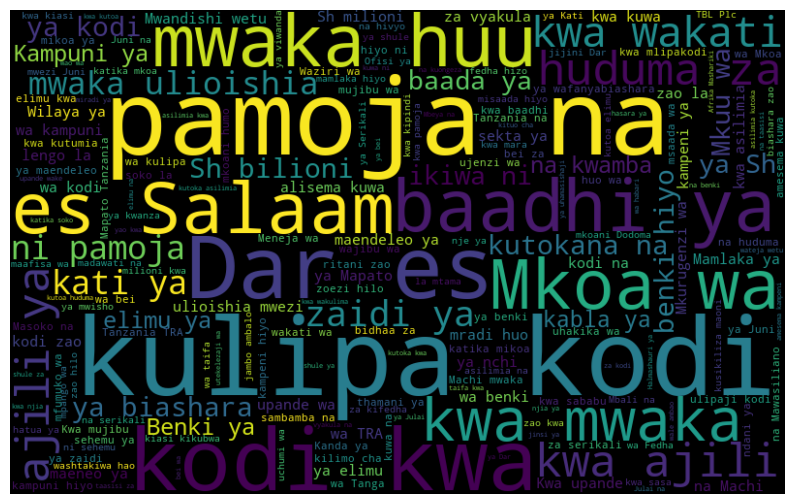

In [42]:
# wordcloud for category Uchumi
subset=train_df_copy[train_df_copy.category=="uchumi"]
text=subset.content.values # list of sentences
words =" ".join(text)# convert list of sentences into a paragraph of sentences
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: kulipa, kodi, benki, kampuni etc.

##### Wordcloud for category 'Kitaifa'

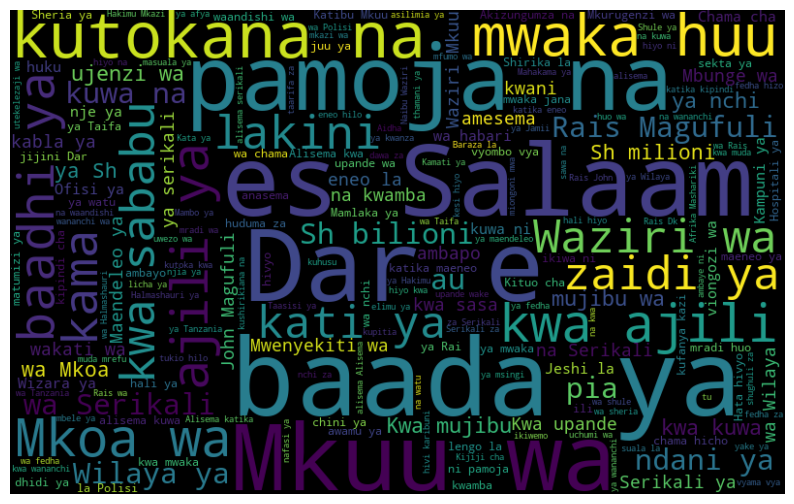

In [43]:
# wordcloud for category Kitaifa
subset=train_df_copy[train_df_copy.category=="kitaifa"]
text=subset.content.values 
words =" ".join(text)
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: waziri, mkuu, wilaya, mkoa, Rais magufuli etc.

##### Wordcloud for category 'Michezo'

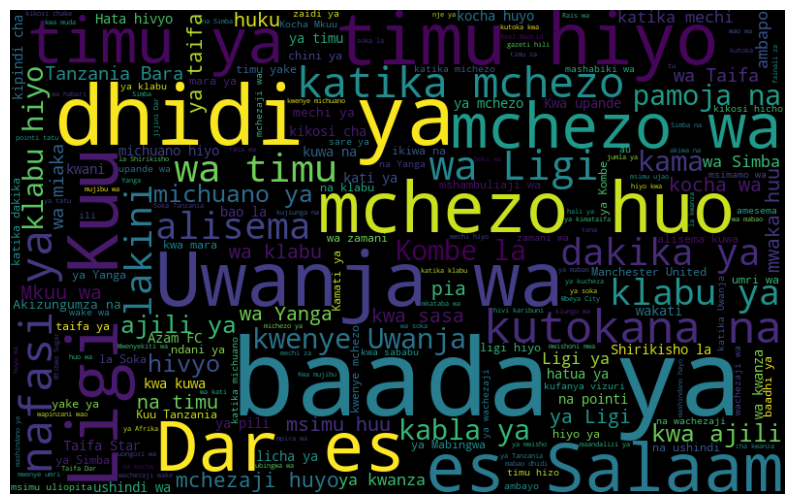

In [44]:
# wordcloud for category Michezo
subset=train_df_copy[train_df_copy.category=="michezo"]
text=subset.content.values 
words =" ".join(text)
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: mchezo, uwanja, timu, klabu, dhidi ya, ligi, kombe, etc.

##### Wordcloud for category 'kimataifa'

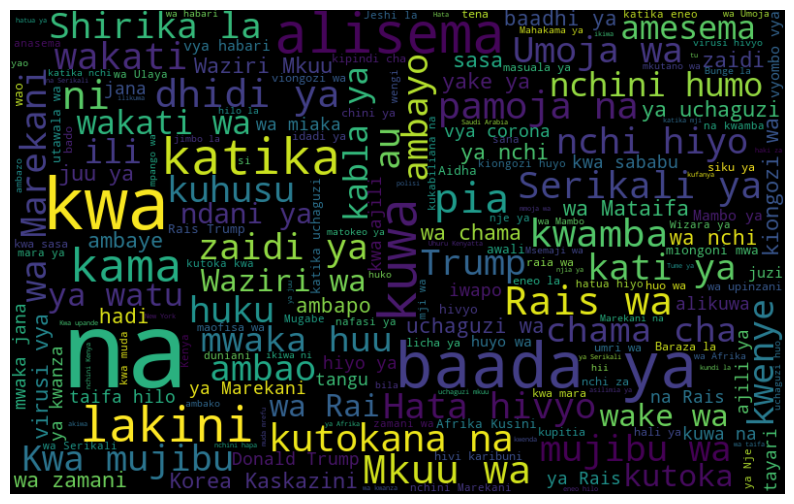

In [45]:
# wordcloud for category Kimataifa
subset=train_df_copy[train_df_copy.category=="kimataifa"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: shirika, Trump, serikali, marekani etc.

##### Wordcloud for category 'Burudani'

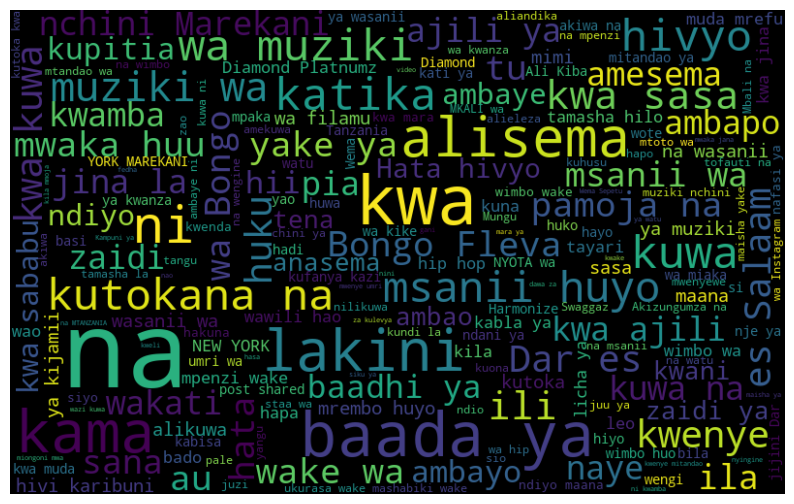

In [46]:
# wordcloud for category Burudani
subset=train_df_copy[train_df_copy.category=="burudani"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: Bongo Fleva, msanii, filamu, Diamond Platnumz etc.

##### Wordcloud for category 'Afya'

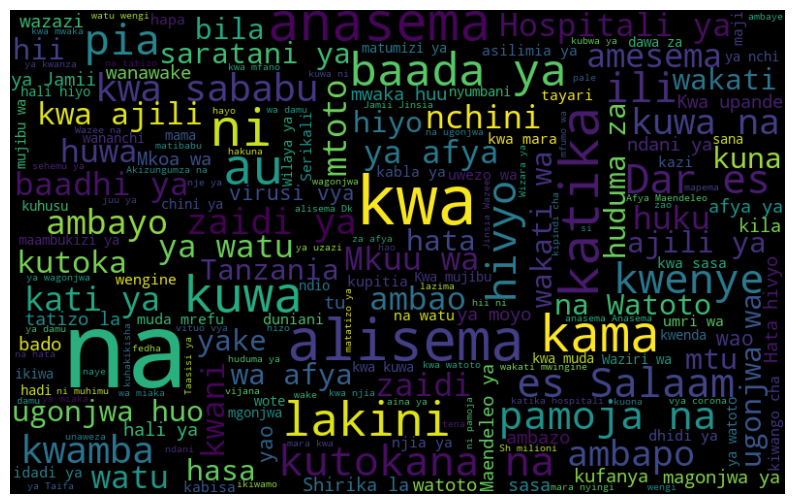

In [47]:
# wordcloud for category Afya
subset=train_df_copy[train_df_copy.category=="afya"]
text=subset.content.values
words =" ".join(text)
create_wordcloud(words)

From the above wordcloud, we can observe that the frequent words in this category include: afya, hospitali, ugonjwa, saratani etc.

## Bivariate analysis

#### **Average Word Count by Category**

In [26]:
df_grouped = train_df_copy.groupby('category', as_index=False)['word_count'].mean()

fig = px.bar(df_grouped, x='category', y='word_count', color='category',
             title='Average Word Count by Category',
             labels={'category': 'Category', 'word_count': 'Average Word Count'},
             barmode='group') 
fig.write_image('word_count_by_category.jpg')  
fig.show()


This plot shows the average word count by category, which reveals interesting differences between categories:

#### **Insights**:
Higher Average Word Count for "afya" and "kitaifa".The afya category has the highest average word count (~300 words), suggesting that articles in this category are typically longer and more detailed. The average word count is as follows in descending order:

1. Afya ~ 305
2. Kitaifa ~ 262
3. Uchumi ~ 203
4. Kimataifa ~ 196
5. Michezo ~ 186
6. Burudani ~ 150


#### **Average Text Length by Category**

In [27]:
df_grouped = train_df_copy.groupby('category', as_index=False)['text_length'].mean()

fig = px.bar(df_grouped, x='category', y='text_length', color='category',
             title='Average Text Length by Category',
             labels={'category': 'Category', 'text_length': 'Average Text Length'},
             barmode='group')  
fig.write_image('text_length_by_category.jpg')
fig.show()



This plot shows the average text length by category, which reinforces the patterns seen in the word count analysis:

#### Insights:
The afya category has the highest average text length (~1800 characters), indicating that health-related articles tend to be more detailed. Kitaifa also has relatively long texts, which aligns with the detailed nature of national news. Burudani articles have the shortest average text length (~900 characters), consistent with their shorter average word count. The order of text length in descending order is as follows:

1. Afya ~ 1887 
2. Kitaifa ~ 1662
3. Uchumi ~ 1307
4. Kimataifa ~ 1242
5. Michezo ~ 1149
6. Burudani ~ 916

## Multivariate Analysis

#### **Text Length vs Word Count by Category**

In [28]:
fig = px.scatter(train_df_copy, x='text_length', y='word_count', color='category',
                 title='Text Length vs Word Count by Category',
                 labels={'text_length': 'Text Length', 'word_count': 'Word Count'})
fig.write_image('text_length_vs_word_count.jpg')  


This scatter plot shows a strong positive correlation between text length and word count across different categories. Here's what it suggests about the data:

#### **Key Insights:**
1. **Linear Relationship**

The almost perfect diagonal alignment indicates that text length and word count increase proportionally — longer texts have more words, which is expected since text length typically reflects character count.

2. **Category Consistency**

The consistent clustering of categories suggests that the relationship between text length and word count holds across different categories — no major outliers by category.

3. **Outliers**

There are a few points (especially at high text lengths) that are slightly off the line — these could be unusual texts with higher or lower word density (e.g., many special characters or formatting differences).

4. **Data Quality**

The clean clustering implies that the data is relatively clean and well-structured, without major inconsistencies across categories.



# Preprocessing

This step involves preparing the clean data for modeling.
1. Creating pipelines for vectorizing the feature and label encoding the target.
2. Calling the train and test, Xand y for use in model training and testing

### Pipelines

#### Preprocessing the Features

Machine learning and deep learning models do deal with texts hence the need to change the text to a format which the models would be able to handle the text. Term Frequency-Inverse Document Frequency Vectorizer converts text data into numerical feature vectors that can be used by machine learning and deep learning models. TF-IDF is useful because:

1. Terms that are unique to a document are given higher weight.

2. Terms that are common across all documents (like "za" or "na") are downweighted.

3. It helps improve the relevance of features for text classification and clustering.1. 

In [29]:
# Define the preprocessing pipeline
preprocessing_pipeline = Pipeline([
    ("text_cleaner", SwahiliTextCleaner()),
    ("tfidf", TfidfVectorizer(max_features=5000))  # Convert text to numerical features
])

#### Preprocessing the target

The target being categorical, we need to encode the different classes so that the model can use this format. We use label encoding which  assigns numerical labels to the different classes.

In [30]:
# Custom function to encode labels
def encode_labels(y):
    le = LabelEncoder()
    return le.fit_transform(y)

# Create label encoding pipeline for target
encoding_pipeline = Pipeline([
    ("label_encoder", FunctionTransformer(encode_labels))
])

In [31]:
# Apply the pipeline to the target on training and test sets
train_df["category_encoded"] = encoding_pipeline.fit_transform(train_df["category"])
test_df["label_encoded"] = encoding_pipeline.transform(test_df["label"])

In [32]:
# Apply the pipeline to the 'content' and 'text' column only (of both train and test sets)
X_train  = preprocessing_pipeline.fit_transform(train_df["content"])
X_test= preprocessing_pipeline.transform(test_df["text"])



#### Calling the Target and features for train and test data

In [33]:
y_train = train_df["category_encoded"]
y_test = test_df["label_encoded"]